# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import  models,layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE =64
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

# Load Data

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/Cancer Detection/Brain_tumor_dataset/Training",
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size =(IMAGE_SIZE,IMAGE_SIZE)

)

Found 2870 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

(64, 256, 256, 3)
[1 1 1 0 3 0 2 3 0 1 2 1 2 3 3 2 0 0 1 1 1 0 1 0 3 1 0 3 3 3 1 1 0 0 0 1 1
 3 1 2 3 3 1 2 0 1 0 0 3 1 1 1 3 0 3 1 1 1 2 0 0 3 3 0]


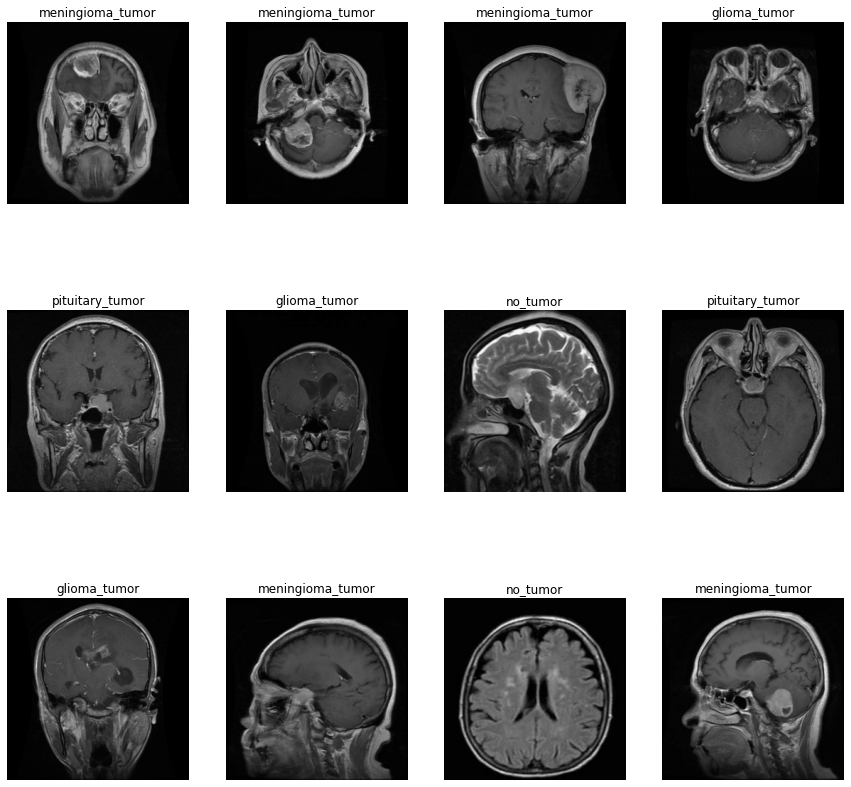

In [ ]:
plt.figure(figsize=(15,15))
for image_batch , labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

In [ ]:
#80% ==> Training
#20% ==> test
  #10% ==> validation
  #10% ==> Test

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_splt=0.1,shuffle=True,shuffle_size=10000 ):
  assert (train_split+test_splt+val_split) == 1
  ds_size = len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size= int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds,test_ds

In [ ]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)
len(val_ds)
len(test_ds)

5

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for image_batch,labels_batch in dataset.take(1):
  print(image_batch[0].numpy()/255) 

[[[0.00196078 0.00196078 0.00196078]
  [0.00196078 0.00196078 0.00196078]
  [0.00196078 0.00196078 0.00196078]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.00196078 0.00196078 0.00196078]
  [0.00196078 0.00196078 0.00196078]
  [0.00196078 0.00196078 0.00196078]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.00980392 0.00980392 0.00980392]
  [0.00980392 0.00980392 0.00980392]
  [0.00980392 0.00980392 0.00980392]]

 ...

 [[0.00588235 0.00588235 0.00588235]
  [0.00588235 0.00588235 0.00588235]
  [0.00588235 0.00588235 0.00588235]
  ...
  [0.01372549 0.01372549 0.01372549]
  [0.01372549 0.01372549 0.01372549]
  [0.01372549 0.01372549 0.01372549]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [ ]:
resize_and_rescale = tf.keras.Sequential([
              layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
              layers.experimental.preprocessing.Rescaling(1.0/255)
])
data_augmentation = tf.keras.Sequential([
              layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
              layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =4

CNNmodel = models.Sequential([
                   resize_and_rescale,
                   data_augmentation,
                   layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(64,(3,3),activation='relu'),
                   layers.MaxPooling2D((2,2)),   
                               
                   layers.Flatten(),
                   layers.Dense(64,activation="relu"),
                   layers.Dense(n_classes,activation='softmax'),                 

])
#print(input_shape)
CNNmodel.build(input_shape=input_shape)


In [ ]:
CNNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (64, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
CNNmodel.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = CNNmodel.fit(
    train_ds,
    batch_size = 4,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/50
36/36 [==============================] - 875s 7s/step - loss: 1.2899 - accuracy: 0.3749 - val_loss: 1.1053 - val_accuracy: 0.4570
Epoch 2/50
36/36 [==============================] - 255s 7s/step - loss: 1.0957 - accuracy: 0.5170 - val_loss: 0.9883 - val_accuracy: 0.6094
Epoch 3/50
36/36 [==============================] - 255s 7s/step - loss: 1.0134 - accuracy: 0.5732 - val_loss: 0.8794 - val_accuracy: 0.6602
Epoch 4/50
36/36 [==============================] - 256s 7s/step - loss: 0.9572 - accuracy: 0.6112 - val_loss: 0.8162 - val_accuracy: 0.6484
Epoch 5/50
36/36 [==============================] - 255s 7s/step - loss: 0.8948 - accuracy: 0.6347 - val_loss: 0.8137 - val_accuracy: 0.6602
Epoch 6/50
36/36 [==============================] - 255s 7s/step - loss: 0.8273 - accuracy: 0.6578 - val_loss: 0.7236 - val_accuracy: 0.7031
Epoch 7/50
36/36 [==============================] - 255s 7s/step - loss: 0.8012 - accuracy: 0.6683 - val_loss: 0.6855 - val_accuracy: 0.7148
Epoch 8/50
36

In [ ]:
scores = CNNmodel.evaluate(test_ds)
print(scores)

5/5 [==============================] - 17s 2s/step - loss: 0.1970 - accuracy: 0.9125
[0.19695411622524261, 0.9125000238418579]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
val_loss = history.history['val_loss']
loss =history.history['loss']

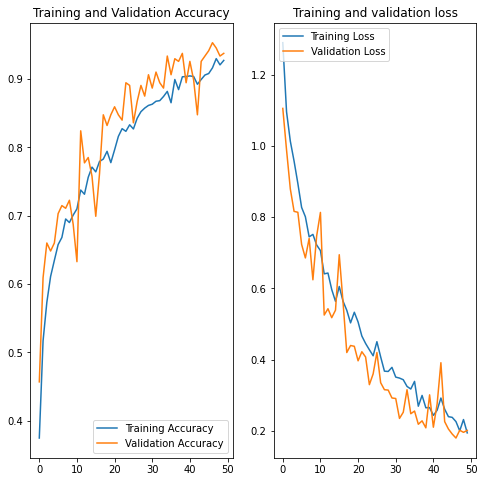

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and validation loss')
plt.show()

# Actual vs Predict

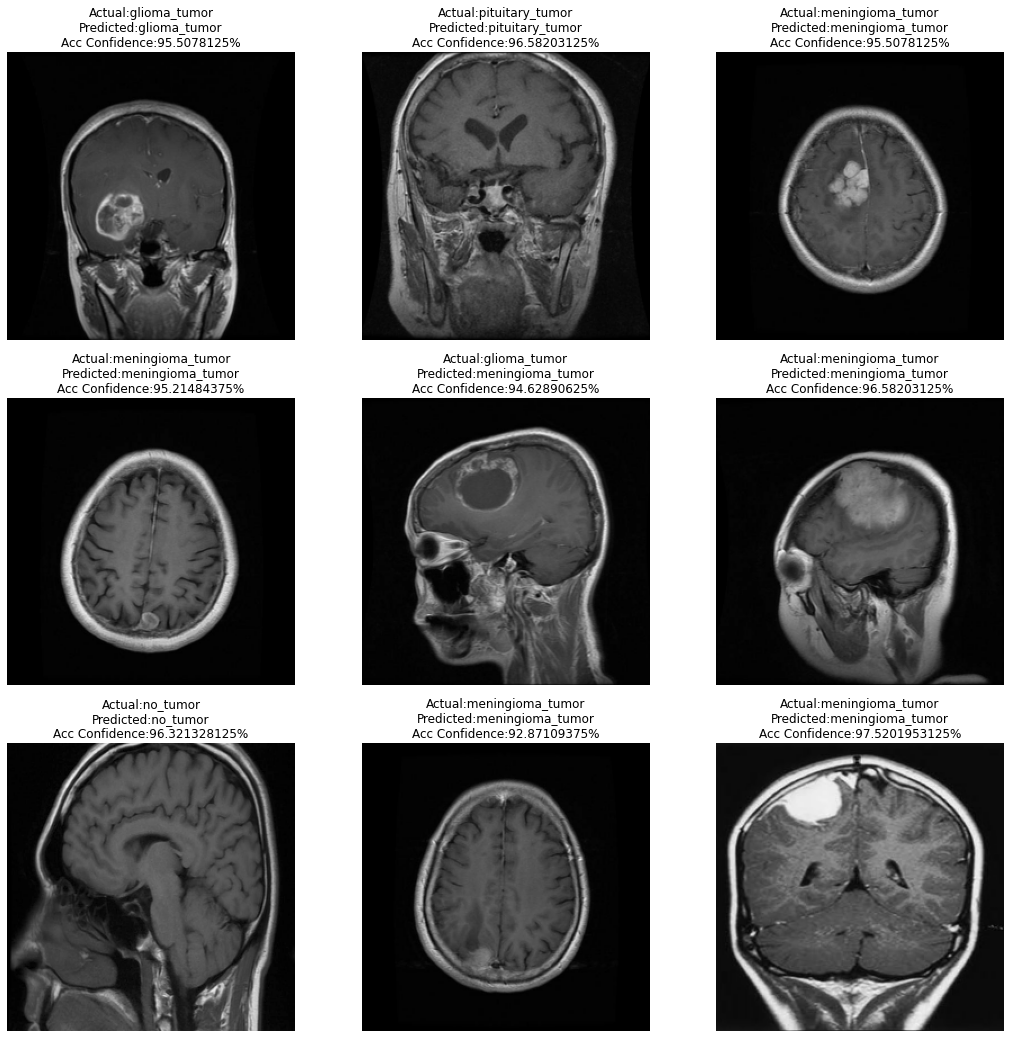

In [ ]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  #plt.imshow(first_image)
  
  plt.figure(figsize=(18,18))
  for i in range(9):
    plt.subplot(3,3,i+1)
    prediction_value = CNNmodel.predict(image_batch)
    prediction_value_name=class_names[np.argmax(prediction_value[i])]
    actual_value_name = class_names[labels_batch[i].numpy()]
    confidence = (round(100*(np.max(image_batch[i])),2)/256)
    confidence_str = str(confidence)
   # print(confidence_str)
   # print("First image to predict")
   # print("Actual value:::"+actual_value_name)
   # print("Prediction value::"+prediction_value_name)
    first_image = image_batch[i].numpy().astype('uint8')
    plt.imshow(first_image)
    plt.title("Actual:"+(actual_value_name)+"\nPredicted:"+(prediction_value_name)+"\nAcc Confidence:"+(confidence_str)+"%")
    #plt.title()
    plt.axis("off")
 